In [1]:
from google.colab import files
uploaded = files.upload()

Saving binary (1).csv to binary (1).csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset= pd.read_csv('binary (1).csv')
dataset.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


#HANDLING CATEGORICAL DATA

In [4]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('binary (1).csv') 
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[ 0.    4.    3.61]
 [ 1.   18.    3.67]
 [ 1.   25.    4.  ]
 ...
 [ 0.    8.    2.63]
 [ 0.   20.    3.65]
 [ 0.   15.    3.89]]


In [5]:
x = dataset[['gre',	'gpa','rank'	]]
#separate the other attributes from the predicting attribute

In [6]:
y = dataset[['admit']]
#separte the predicting attribute into Y for model training 

#GRAPHS

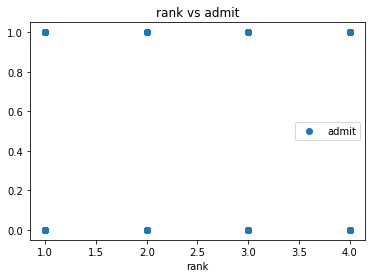

In [7]:
dataset.plot(x='rank', y='admit' , style='o')
plt.title('rank vs admit')
plt.show()

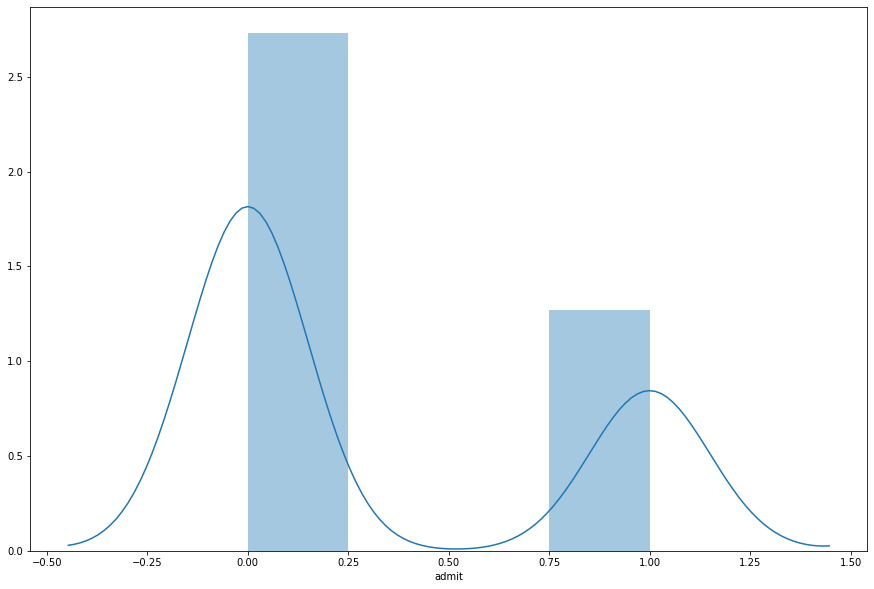

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['admit'])
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [10]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.44       0.51149425 0.66666667]
 [0.56       1.         0.66666667]
 [0.88       1.         0.66666667]
 [0.8        0.74712644 0.        ]
 [0.68       0.59770115 0.33333333]
 [0.84       0.66666667 0.33333333]
 [0.44       0.33908046 0.66666667]
 [0.64       0.63793103 0.        ]
 [0.64       1.         0.33333333]
 [0.76       0.94252874 0.        ]
 [0.8        0.79885057 0.33333333]
 [0.48       0.74137931 1.        ]
 [0.52       0.53448276 0.66666667]
 [0.48       0.64942529 0.66666667]
 [0.68       0.3908046  0.33333333]
 [0.36       0.65517241 0.33333333]
 [0.4        0.75287356 0.66666667]
 [1.         0.45402299 0.33333333]
 [0.44       0.94252874 0.66666667]
 [0.52       0.63218391 0.        ]
 [0.72       0.60344828 1.        ]
 [0.76       0.9137931  0.66666667]
 [0.72       0.86781609 0.66666667]
 [0.8        0.89655172 0.66666667]
 [0.44       0.48275862 1.        ]
 [0.4        0.55747126 1.        ]
 [0.64       0.46551724 0.33333333]
 [0.64       0.33908046 0.33

#ALGORITHM

In [11]:
model =LogisticRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [12]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print('Intercept is :',model.intercept_)

Intercept is : [-2.9077738]


In [14]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[ 0.00189081  0.73213499 -0.62606569]]


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [15]:
predictions = model.predict(x_test)

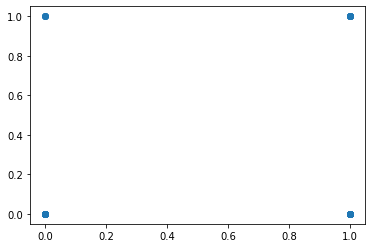

In [16]:
plt.scatter(y_test,predictions)

#EVALUATION

In [17]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,predictions))
print('Mean squared error is:', metrics.mean_squared_error(y_test,predictions))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean abolute error is: 0.275
Mean squared error is: 0.275
Root mean squared error is: 0.5244044240850758


In [18]:
print(metrics.accuracy_score(y_test, predictions))

0.725


#SAVING THE MODEL USING PICKLE LIBRARY

In [19]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
y_train = y_train[0:80]
results =confusion_matrix(y_train, predictions)
print(results)

[[47  6]
 [24  3]]


Precision, Recall, Support, Fscore

In [21]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_train, predictions, average='macro')

(0.4976525821596244, 0.49895178197064993, 0.46236559139784944, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [22]:
results =confusion_matrix(y_test, predictions)
print(results)

[[52  3]
 [19  6]]


Precision, Recall, Support, Fscore

In [23]:
import numpy
from sklearn.metrics import precision_recall_fscore_support


precision_recall_fscore_support(y_test, predictions, average='macro')

(0.6995305164319249, 0.5927272727272728, 0.5891690009337067, None)